## PREDICTION OF SALE PRICE OF HOUSES 

Regression is a technique used to model and analyze the relationship betweem variables and how these variables contribute and are related to producing a particular outcome together.

From the task, the model to setup is the Multiple Linear Regression since there are different independent variables in the dataset and the outcome(Sale price) is a continuous variable.

y = $β_0$ + $β_1$$x_1$ + $β_2$$x_2$ + ···$β_k$$x_k$ + E

In [1]:
#import libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [2]:
#load data 
trainset = pd.read_csv("train.csv")

In [3]:
trainset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
testset = pd.read_csv("test.csv")

In [6]:
testset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


save the id columns and dropped since it does not have any relationship with the variable in question(sale price) and would be used to later when saving the prediciton output.

In [7]:
ids = testset["Id"]

In [8]:
trainset = trainset.drop("Id", axis = 1)
testset = testset.drop("Id", axis = 1)

#### Outliers 

From the decock pdf, it is known that, a plot of Sale Price versus the GrLivArea will indicated these outliers in the dataset

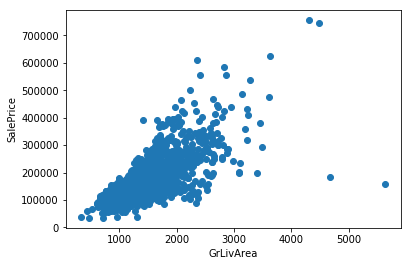

In [9]:
plt.scatter(x = trainset["GrLivArea"], y = trainset["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea")
plt.show()

In [10]:
#removing the outiliers which are more than 4000 sq ft from the dataset 
traindata = trainset.drop(trainset[(trainset["GrLivArea"]>4000) & (trainset["SalePrice"]<300000)].index).reset_index(drop=True)

In [11]:
trainset_len = len(traindata)
trainset_len

1458

### Sale Price(Target Variable) Analysis  

Sale prices is our dependent(response or target) variable since different variables available in the dataset affects it. To know more about the Sale Price varibale. A summary statistic will be performed 

In [12]:
traindata["SalePrice"].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average sale price is 180932.919067 with the minimum sale price of a house being 34900 and the maximum, 755000

For the sale of houses, there are variables that affect the sale prices. From a research run, it is known that variables such as:
- the type of dwelling(building types)
- the neighborhood 
- Year built 
- the sytle of dwealing(housestyle)
- type of foundation 
- Pool area
- Fence 
- Availability of garage 
- Availability of fireplaces 
- Bathrooms 
- Bedrooms 
- Area of the building
- type of heating 

To know exactly which variables are significant or really affect the sale prices of houses, a correlation test is performed. This measures the relationship between the variables and the sale price of houses. 

In [13]:
#finding the relationship between the saleprice and other variables 
correlation = traindata.corr()
correlation.sort_values(["SalePrice"])
correlation.SalePrice

MSSubClass      -0.084276
LotFrontage      0.370584
LotArea          0.268179
OverallQual      0.795774
OverallCond     -0.077948
YearBuilt        0.523608
YearRemodAdd     0.507717
MasVnrArea       0.482719
BsmtFinSF1       0.409384
BsmtFinSF2      -0.011422
BsmtUnfSF        0.214460
TotalBsmtSF      0.651153
1stFlrSF         0.631530
2ndFlrSF         0.320532
LowQualFinSF    -0.025625
GrLivArea        0.734968
BsmtFullBath     0.228459
BsmtHalfBath    -0.016881
FullBath         0.562165
HalfBath         0.284590
BedroomAbvGr     0.168245
KitchenAbvGr    -0.135946
TotRmsAbvGrd     0.537769
Fireplaces       0.469862
GarageYrBlt      0.487156
GarageCars       0.641047
GarageArea       0.629217
WoodDeckSF       0.324758
OpenPorchSF      0.321142
EnclosedPorch   -0.128646
3SsnPorch        0.044568
ScreenPorch      0.111415
PoolArea         0.099490
MiscVal         -0.021203
MoSold           0.046124
YrSold          -0.028882
SalePrice        1.000000
Name: SalePrice, dtype: float64

from the above correlation matrix, it can be seen that the variables that extremely significant to the sale price of a house are the OverallQuality, Yearbuilt, YearRemolded, Masonry veneer, Total square feet of basement area, First Floor square feet, Above grade (ground) living area square feet, the garage area in square feet, the garage size in terms of car capacity, Year garage was built, the fireplace, Total rooms above grade

Check the skewness of the data. This is done to measure the symmetry of the dataset 

In [14]:
from scipy.stats import skew, kurtosis

In [15]:
skew = skew(traindata["SalePrice"])
kurt = kurtosis(traindata["SalePrice"])

In [16]:
print("skewness:", skew)
print("kurtosis:", kurt)

skewness: 1.8793604459195012
kurtosis: 6.496606038358726


since the skewness is greater than 1. it can be seen that the data is highly skewed. The data set is therefore skewed to the right.

From the kurtosis caluclated, it can be seen the data set is not normally distributed since the kurtosis is greater than one.

In [17]:
mean = trainset["SalePrice"].describe()['mean']
std = trainset["SalePrice"].describe()['std']
#note standard deviation is the deviation of the data from the mean 

In [18]:
print("mean:", mean)
print("standard deviation:", std)

mean: 180921.19589041095
standard deviation: 79442.50288288663


/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


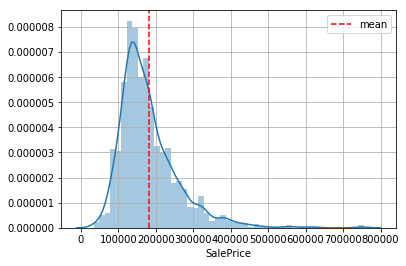

In [19]:
#plotting skewness 
sns.distplot(trainset["SalePrice"], norm_hist = True)
plt.axvline(x = mean, color = "red", linestyle = "--", label = "mean")
plt.legend()
plt.grid()
plt.show()

In order to obtain a normal distribution, the dataset will be transformed by taking the logarithm of it 

In [20]:
Transformed = np.log1p(traindata["SalePrice"])
Transformed.describe()

count    1458.000000
mean       12.024015
std         0.399713
min        10.460271
25%        11.774720
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [21]:
mean_Trans = Transformed.describe()["mean"]
std_Trans = Transformed.describe()["std"]

In [22]:
print("mean:", mean_Trans)
print("standard deviation:", std_Trans)

mean: 12.02401515568252
standard deviation: 0.3997128276063394


In [23]:
print("skewness of transformed:", Transformed.skew())
print("kurtosis of transformed:", Transformed.kurt())

skewness of transformed: 0.12157976050304875
kurtosis of transformed: 0.8047507917418972


/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


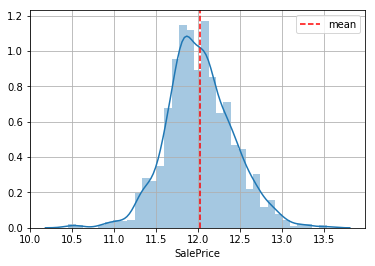

In [24]:
sns.distplot(Transformed, norm_hist = True)
plt.axvline(x = mean_Trans, color = "red", linestyle = "--", label = "mean")
plt.legend()
plt.grid()
plt.show()

### Feature Engineering 

In [25]:
#concating the trainset and the testset 
data = pd.concat((traindata, testset))

In [26]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [27]:
#drop saleprice since it the dependent variable and does not appear in the test set
dataa = data.drop("SalePrice", axis = 1)

In [28]:
#identifying missing values 
dataa.isnull().values.any()

True

In [29]:
#how many missing values are there in total 
dataa.isnull().sum().sum()

13958

In [30]:
#which variables contain the missing values and their total
dataa.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2719
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2346
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotFrontage       486
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2812
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive

In [31]:
pd.set_option('display.max_rows', 79) #show all variables 
dataa.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2719
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2346
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
Functional          2
GarageArea          1
GarageCars          1
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
KitchenAbvGr        0
KitchenQual         1
LandContou

From the above, it can be seen that some values of the dataset are missng. To deal with the missing values, they can either be dropped or imputed. From a realization that most of the variables that have missing values are likely to affect the sale price of a house, these missing values can therefore be imputed.

In [32]:
#For Lotfrontage, the median can be used to replace the missing values since it is a float 
median = dataa["LotFrontage"].median()
dataa["LotFrontage"].fillna(median, inplace = True)
#all missing values have been replaced by the median 

In [33]:
#missing values for alley. The mssing values in alley shows that there is no access to alley and since it is a 
#categorical variable, we ca replace the missing values with None
dataa["Alley"].fillna("None", inplace = True)

In [34]:
#missing values here can be filled with none meaning no Masonry veneer type and also it is a categorical data 
dataa["MasVnrType"].fillna("None", inplace = True)

In [35]:
#missing values here can be filled with none meaning no Masonry veneer type and also it is a quantiative data 
#the number of missing values for MasVnrType is not the same as the number of missing values for MasVnrArea. Therefore,
#where the value of MasVnrType is avaliable, the median of MasVnrArea would be used to impute the missing value 
dataa.loc[dataa["MasVnrType"] == "None","MasVnrArea"] = 0
dataa["MasVnrArea"] = dataa["MasVnrArea"].fillna(dataa["MasVnrArea"].median())

In [36]:
#the missing values in BsmtQual shows that there is no basement which means they can be replaced with None since 
#the variable is a qualitative data. same can be done for BsmtCond, BsmtExposure, BsmtFinType2, BsmtFinType1
dataa["BsmtQual"].fillna("None", inplace = True)
dataa["BsmtCond"].fillna("None", inplace = True)
dataa["BsmtExposure"].fillna("None", inplace = True)
dataa["BsmtFinType1"].fillna("None", inplace = True)
dataa["BsmtFinType2"].fillna("None", inplace = True)

In [37]:
#the missing values in BsmtFinSF1 shows that there is no basement which means they can be replaced with 0 since
#it is a quantitative variable. Same can be done to BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF and TotalBsmtSF
dataa["BsmtFinSF1"].fillna(0, inplace = True)
dataa["BsmtFinSF2"].fillna(0, inplace = True)
dataa["BsmtFullBath"].fillna(0, inplace = True)
dataa["BsmtHalfBath"].fillna(0, inplace = True)
dataa["BsmtUnfSF"].fillna(0, inplace = True)
dataa["TotalBsmtSF"].fillna(0, inplace = True)

In [38]:
dataa["Exterior1st"].mode()

0    VinylSd
dtype: object

In [39]:
#setting the missing value to Vinyl Siding since that is what is mostly used 
dataa["Exterior1st"].fillna("VinylSd", inplace = True)

In [40]:
dataa["Exterior2nd"].mode()

0    VinylSd
dtype: object

In [41]:
#setting the missing value to Vinyl Siding since that is what is mostly used 
dataa["Exterior2nd"].fillna("VinylSd", inplace = True)

In [42]:
dataa["Functional"].mode()

0    Typ
dtype: object

In [43]:
#setting the missing value to Typical Functionality since that is what is mostly used 
dataa["Functional"].fillna("Typ", inplace = True)

In [44]:
#the missing values for FireplaceQu shows that there is non fireplace and since it is also a categorical data, NA can
#be replaced with None 
dataa["FireplaceQu"].fillna("None", inplace = True)

the missing values in GarageType shows that there is no garage which means they can be replaced with None since 
the variable is a qualitative data. same can be done for GarageFinish, GarageQual and GarageCond
the missing values in GarageArea shows that there is no garage which means they can be replaced with 0 since it is a quantitative variable. Same can be done to GarageCars and GarageYrBlt.
But it could been seen that, the number of missing values of GarageType does not correspond with the number of missing values for  GarageYrBlt, GarageArea, GarageCars, GarageFinish, GarageQual and GarageCond. Therefore, houses with GarageType but no GarageYrBlt, GarageArea, GarageCars, GarageFinish, GarageQual and GarageCond, will have them imputed for but using the median of the quantative data and the mode for categorical data.

In [45]:
dataa["GarageType"].fillna("None", inplace = True)

In [46]:
dataa.loc[dataa["GarageType"] == "None","GarageYrBlt"] = dataa["YearBuilt"][dataa["GarageType"]=="None"]
dataa.loc[dataa["GarageType"] == "None","GarageCars"] = 0
dataa.loc[dataa["GarageType"] == "None","GarageArea"] = 0
dataa.loc[dataa["GarageType"] == "None","GarageFinish"] = "None"
dataa.loc[dataa["GarageType"] == "None","GarageQual"] = "None"
dataa.loc[dataa["GarageType"] == "None","GarageCond"] = "None"

In [47]:
dataa["GarageArea"] = dataa["GarageArea"].fillna(dataa["GarageArea"].median())
dataa["GarageCars"] = dataa["GarageCars"].fillna(dataa["GarageCars"].median())
dataa["GarageYrBlt"] = dataa["GarageYrBlt"].fillna(dataa["GarageYrBlt"].median())

In [48]:
dataa["GarageFinish"].mode()

0    Unf
dtype: object

In [49]:
dataa["GarageFinish"].fillna("Unf", inplace = True)

In [50]:
dataa["GarageQual"].mode()

0    TA
dtype: object

In [51]:
dataa["GarageQual"].fillna("TA", inplace = True)

In [52]:
dataa["GarageCond"].mode()

0    TA
dtype: object

In [53]:
dataa["GarageCond"].fillna("TA", inplace = True)

In [54]:
dataa["Electrical"].mode()

0    SBrkr
dtype: object

In [55]:
#setting the missing value to Standard Circuit Breakers since that is what is mostly used 
dataa["Electrical"].fillna("SBrkr", inplace = True)

In [56]:
#missing values for Fence means no fence, there NA can be replaced with none since it is a categorical data 
dataa["Fence"].fillna("None", inplace = True)

In [57]:
dataa["KitchenQual"].mode()

0    TA
dtype: object

In [58]:
#setting the missing value to Typical/Average since that is what is mostly used 
dataa["KitchenQual"].fillna("TA", inplace = True)

In [59]:
dataa["MSZoning"].mode()

0    RL
dtype: object

In [60]:
#setting the missing value to Residential Low Density since that is what is mostly used 
dataa["MSZoning"].fillna("RL", inplace = True)

In [61]:
#missing values for PoolQC means no pool, there NA can be replaced with none since it is a categorical data 
dataa["PoolQC"].fillna("None", inplace = True)

In [62]:
#missing values for MiscFeature means no fence, there NA can be replaced with none since it is a categorical data 
dataa["MiscFeature"].fillna("None", inplace = True)

In [63]:
dataa["SaleType"].mode()

0    WD
dtype: object

In [64]:
#setting the missing value to Warranty Deed - Conventional since that is what is mostly used 
dataa["SaleType"].fillna("WD", inplace = True)

In [65]:
dataa["Utilities"].mode()

0    AllPub
dtype: object

In [66]:
#setting the missing value to All public Utilities (E,G,W,& S) since that is what is mostly used 
dataa["Utilities"].fillna("AllPub", inplace = True)

In [67]:
#checking to see if there are still missing values 
dataa.isnull().values.any()

False

The missing values have been imputed. 

### Creating new features 

In [68]:
dataa["Area"] = dataa["TotalBsmtSF"] + dataa["GrLivArea"]

In [69]:
dataa["TotalFlrSF"] = dataa["1stFlrSF"] + dataa["2ndFlrSF"]

In [70]:
dataa["AllPorchSF"] = dataa["OpenPorchSF"] + dataa["EnclosedPorch"] + dataa["3SsnPorch"] + dataa["ScreenPorch"]

Since most of the utilities used are "All public Utilities", it will not have an impact on the sale prices of houses therefore, it is safe to drop it

In [71]:
dataa["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [72]:
dataa = dataa.drop("Utilities", axis = 1)

In [73]:
# converting variable which are to be categorical data instead of numerical into categorical 
#note, year is a categorical data since the ratio between two years is not meaning hence classified as categorical

for i in ("MSSubClass", "MoSold", "YrSold"):
    dataa[i] = dataa[i].astype(str)
dataa.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
Functional        object
GarageArea       float64
GarageCars       float64
GarageCond        object
GarageFinish      object
GarageQual        object
GarageType        object
GarageYrBlt      float64
GrLivArea          int64
                  ...   


### Normalizing the highly skewed numerical variables in the dataset  

In [74]:
numerical_features = dataa.dtypes[dataa.dtypes != "object"].index 
skewed_feats = dataa[numerical_features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skewness' :skewed_feats})
skewness

,Skewness
MiscVal,21.950962
PoolArea,17.697766
LotArea,13.116240
LowQualFinSF,12.090757
3SsnPorch,11.377932
KitchenAbvGr,4.302763
BsmtFinSF2,4.146636
EnclosedPorch,4.004404
ScreenPorch,3.947131
BsmtHalfBath,3.932018


normalizing numerical(quantitative) variables with skewness greater than 1.

In [75]:
numerical_features = ["MiscVal", "PoolArea", "LotArea", "LowQualFinSF", "3SsnPorch", "KitchenAbvGr", "EnclosedPorch",
                      "ScreenPorch", "BsmtHalfBath", "MasVnrArea", "OpenPorchSF", "WoodDeckSF",
                      "LotFrontage", "Area", "GrLivArea", "TotalFlrSF", "1stFlrSF", "AllPorchSF", "BsmtFinSF2"]

In [76]:
for i in numerical_features:
    dataa[i] = np.log1p(dataa[i])
dataa.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Area,TotalFlrSF,AllPorchSF
0,6.753438,854,0.0,None,3,1Fam,TA,No,706.0,0.0,...,Pave,8,856.0,0.000000,2003,2003,2008,7.850493,7.444833,4.127134
1,7.141245,0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,Pave,6,1262.0,5.700444,1976,1976,2007,7.833996,7.141245,0.000000
2,6.825460,866,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,Pave,6,920.0,0.000000,2001,2002,2008,7.903596,7.488294,3.761200
3,6.869014,756,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,Pave,7,756.0,0.000000,1915,1970,2006,7.813592,7.448916,5.730100
4,7.044033,1053,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,Pave,9,1145.0,5.262690,2000,2000,2008,8.114923,7.695758,4.442651


## Converting categorical data into numerical(quantitative) data 

Before setting up the regression model, the categorical data(object) will be transformed into quantitative variables 

##### To do so, there are various methods to encode categorical variables.
- Label encoding
- One-hot encoding
- Binary encoding 
- Backwards Difference encoding 

For encoding the categorical variables, variables that consist of two or more categrories, the label encoding will be used.

Label Encoding 

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for i in cols:
    le = LabelEncoder()
    dataa[i] = le.fit_transform(list(dataa[i]))  

### One Hot Encoding 

In [79]:
dataa = pd.get_dummies(dataa)

# Fitting the Model

In [80]:
y = traindata["SalePrice"]
x_train = dataa[:trainset_len]
x_test = dataa[trainset_len:]

In [81]:
from math import sqrt
from sklearn.model_selection import cross_val_score

In [82]:
def rmse_md(estimator, x, y):
    rmse = np.sqrt(-cross_val_score(estimator, x, y, cv= 15, scoring="neg_mean_squared_error")).mean()
    return rmse  #Root mean square error

In [83]:
#in order to deal with the overall outliers in the dataset
from sklearn.preprocessing import RobustScaler

In [84]:
R = RobustScaler()
R.fit(x_train)
x_train = R.transform(x_train) #normilaze the dataset to withstand outliers 

In [85]:
R.fit(x_test)
x_test = R.transform(x_test)

In [86]:
y = Transformed #log transform of the target variable

### Bayesian Ridge Regression 

In [87]:
from sklearn import linear_model

In [88]:
br = linear_model.BayesianRidge()
br.fit(x_train, y)
score = rmse_md(br, x_train, y)
print("score of Bayesian Ridge :",score)
R_squared = br.score(x_train, y)
print("score of R_squared :", R_squared)

score of Bayesian Ridge : 0.10911964739653408
score of R_squared : 0.9409534897022167


### Random Forest Regression Model

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rfr = RandomForestRegressor(n_estimators = 720).fit(x_train, y)
score = rmse_md(rfr, x_train, y)
print("score of Random Forest :",score)
R_squared = rfr.score(x_train, y)
print("score of R_squared :", R_squared)

score of Random Forest : 0.13590214975791734
score of R_squared : 0.9843223285768647


A higher $R^2$ does not necessarily mean a good fit. It can be seen that with the Random Forest Regression Model, the Root Mean Sqaure Error is greater as compared to the various models. Hence it is not a good fit here.

### Gradient Boosting Regression Model

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y)
score = rmse_md(gbr, x_train, y)
print("score of Gradient Boosting :",score)
R_squared = gbr.score(x_train, y)
print("score of R_squared :", R_squared)

score of Gradient Boosting : 0.1204560510786863
score of R_squared : 0.9607179637537551


### Ridge Regression Model

For the problem of multicollinearity when it comes to linear regression model, ridge regression is much prefered since it solves the problem

In [93]:
from sklearn.linear_model import RidgeCV  #using the cross validation 

In [94]:
rg = RidgeCV(cv = 15)
rg.fit(x_train, y)
score = rmse_md(rg, x_train, y)
print("score of Ridge Regression :", score)
R_squared = rg.score(x_train, y)
print("score of R_squared :", R_squared)

score of Ridge Regression : 0.10903781494799032
score of R_squared : 0.9407891019046628


### Lasso Regression 

In [95]:
from sklearn.linear_model import LassoCV #using the cross validation

In [96]:
ls = LassoCV(cv = 15)
ls.fit(x_train, y)
score = rmse_md(ls, x_train, y)
print("score of Lasso Regression :", score)
R_squared = ls.score(x_train, y)
print("score of R_squared :", R_squared)

score of Lasso Regression : 0.10765371029486309
score of R_squared : 0.9391277043807827


### ElasticNet Regression

In [97]:
from sklearn.linear_model import ElasticNetCV #using the cross validation

In [98]:
en = ElasticNetCV(cv = 15)
en.fit(x_train, y)
score = rmse_md(en, x_train, y)
print("score of ElasticNet Regression :", score)
R_squared = en.score(x_train, y)
print("score of R_squared :", R_squared)

score of ElasticNet Regression : 0.10774880013036332
score of R_squared : 0.9392373243970314


### XGBOOT

Xgboost an optimized distributed gradient boosting. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

In [99]:
import xgboost 

In [100]:
xgb = xgboost.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=7200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
xgb.fit(x_train, y)
score = rmse_md(xgb, x_train, y)
print("score of xgb:", score)
R_squared = xgb.score(x_train, y)
print("score of R_squared :", R_squared)

score of xgb: 0.11358371470188784
score of R_squared : 0.9659670328092741


### LIGHTGBM

In [101]:
import lightgbm 

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [102]:
lgb = lightgbm.LGBMRegressor(objective='regression',num_leaves= 5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb.fit(x_train, y)
score = rmse_md(lgb, x_train, y)
print("score of lgb:", score)
R_squared = lgb.score(x_train, y)
print("score of R_squared :", R_squared)

score of lgb: 0.11217002898504247
score of R_squared : 0.967819387776388


In [103]:
y_pred_bayesian = np.expm1(br.predict(x_test))
y_pred_lassocv = np.expm1(ls.predict(x_test))
y_pred_GradientBoost = np.expm1(gbr.predict(x_test))
y_pred_elasticnetcv = np.expm1(en.predict(x_test))
y_pred_ridge = np.expm1(rg.predict(x_test))
y_pred_random = np.expm1(rfr.predict(x_test))
y_pred_xgb = np.expm1(xgb.predict(x_test))
y_pred_lgb = np.expm1(lgb.predict(x_test))

In [104]:
print("score of br :",  rmse_md(br, x_train, y))
print("score of ls:", rmse_md(ls, x_train, y))
print("score of en:", rmse_md(en, x_train, y))
print("score of rg:", rmse_md(rg, x_train, y))
print("score of gbr:", rmse_md(gbr, x_train, y))
print("score of xgb:", rmse_md(xgb, x_train, y)) 
print("score of lgb:", rmse_md(lgb, x_train, y))

score of br : 0.10911964739653408
score of ls: 0.10765371029486309
score of en: 0.10774880013036332
score of rg: 0.10903781494799032
score of gbr: 0.12066707553782252
score of xgb: 0.11358371470188784
score of lgb: 0.11217002898504247


From the above, the models with the least root mean sqaure error are Bayesian Ridge Regression, Ridge Regression, Linear Regression, Lasso Regression and ElasticNet Regression. To select the best fit model, ensembling will be used to combine these models to produce a more efficient output 

### Ensemble  

In [105]:
ensemble_score = (0.15 *rmse_md(br, x_train, y) +
                  0.17 * rmse_md(ls, x_train, y) +
                  0.09 * rmse_md(gbr, x_train, y) +
                  0.17 * rmse_md(en, x_train, y) + 
                  0.15 * rmse_md(rg, x_train, y) + 
                  0.13 * rmse_md(xgb, x_train, y) + 
                  0.14 * rmse_md(lgb, x_train, y))
ensemble_score 

0.11067891781326256

In [106]:
output =(0.15 * y_pred_bayesian +
         0.17 * y_pred_lassocv + 
         0.09 * y_pred_GradientBoost + 
         0.17 * y_pred_elasticnetcv  + 
         0.15* y_pred_ridge +
         0.13 * y_pred_xgb + 
         0.14 * y_pred_lgb)

In [126]:
SalePredict = pd.DataFrame(output)
SalePredict["Id"] = ids
SalePredict = SalePredict.rename(columns={0: "SalePrice"})
SalePredict = SalePredict[["Id","SalePrice"]]
SalePredict.to_csv("Submission.csv", index=False)